# Final Project: House Sales in King County, USA 

Data Types

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
file_name = 'kc_house_data.csv'
df=pd.read_csv(file_name)
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

file_name = 'kc_house_data.csv'

# Load the dataset
df = pd.read_csv(file_name)

# Drop the 'id' and 'Unnamed: 0' columns if they exist
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Display the statistical summary of the DataFrame
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame
floor_counts_df = floor_counts.to_frame().reset_index()
floor_counts_df.columns = ['floors', 'count']

# Display the DataFrame
print(floor_counts_df)


   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers

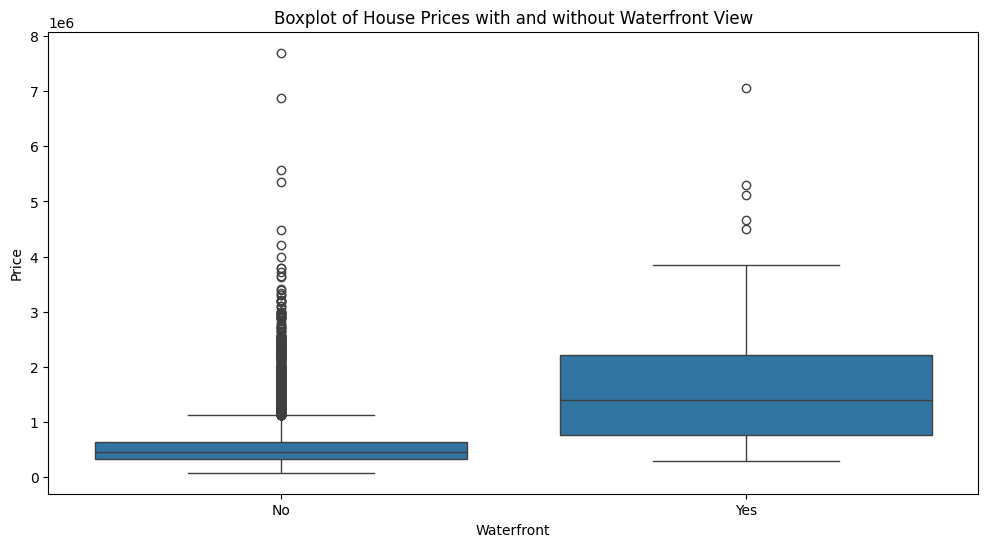

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Create a boxplot to compare prices of houses with and without waterfront view
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of House Prices with and without Waterfront View')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price

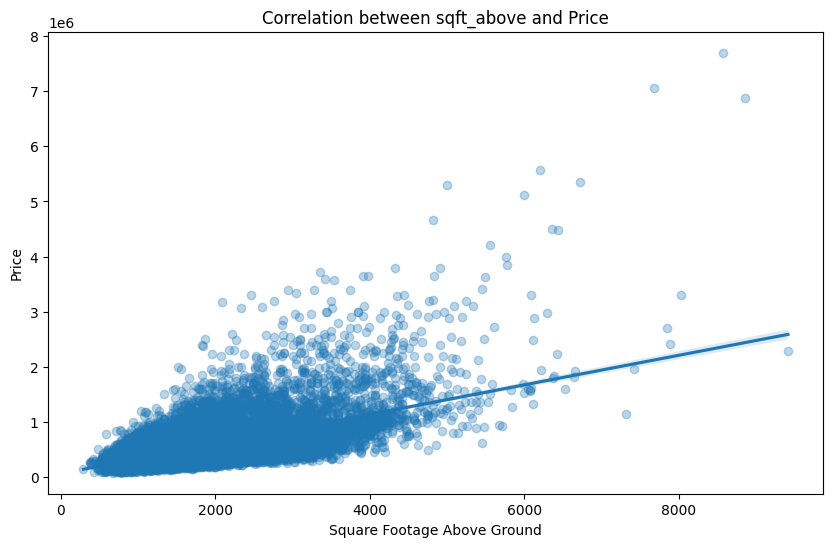

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Create a regplot to determine the correlation between sqft_above and price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.3})
plt.title('Correlation between sqft_above and Price')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price')
plt.show()


Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Define the feature and target variable
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the price using the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


R^2 score: 0.49406905389089006


Fit a linear regression model to predict the 'price' using the list of features:

"floors"
"waterfront"
"lat"
"bedrooms"
"sqft_basement"
"view"
"bathrooms"
"sqft_living15"
"sqft_above"
"grade"
"sqft_living"


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Define the list of features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict the price using the test set
y_pred = model.predict(X_test)
# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


R^2 score: 0.6614827587994063


Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Define the list of features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline with scaling, polynomial transform, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the price using the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


R^2 score: 0.711734482460301


Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Define the list of features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
# Predict the price using the test set
y_pred = ridge_model.predict(X_test)
# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


R^2 score: 0.6614734596866666


Perform a second-order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Load the dataset
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name)

# Define the list of features and the target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial transformation, scaling, and Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the price using the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")


R^2 score: 0.7026581555745436
